In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### K-Nearest Neighbors (KNN)
K-Nearest Neighbors (KNN) is a simple yet effective supervised learning algorithm used for classification and regression tasks. It classifies data points based on the majority class of their k nearest neighbors in the feature space. In regression, it predicts the value of a data point by averaging the values of its k nearest neighbors. The choice of k influences the model's accuracy and generalization.

Steps of KNN:

Choose the number of neighbors (k).
Calculate the distance between the query point and all data points.
Sort the distances and identify the k nearest neighbors.
For classification, assign the class label based on the majority vote of the neighbors.
For regression, predict the output by averaging the values of the nearest neighbors.

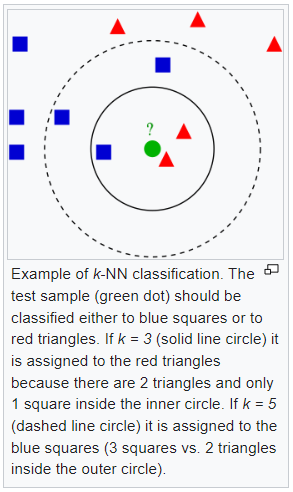

In [2]:
# Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Compute predictions with the trained KNN classifier
y_pred = knn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# For ROC-AUC score, you need to get probabilities instead of class labels
y_prob = knn.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0
